In [23]:
import pylab as pl
import astropy as py
import aplpy
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import constants
from scipy import constants as const
import numpy as np
from matplotlib import cm
import astropy.units as u
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D 
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube
import pyspeckit
from pvextractor import extract_pv_slice, Path, PathFromCenter
from radio_beam import Beam
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize'] = 'xx-large'
plt.rcParams['ytick.labelsize'] = 'xx-large'
plt.rcParams.update({"text.usetex": False,
                     "font.family": "serif",
                     'xtick.direction': 'out',
                     'ytick.direction': 'in'})

In [24]:
vlsr = 8.3

position = SkyCoord("19h37m0.9s","7d34m9.6s")
cutout_size = u.Quantity((5.0, 5.0), u.arcsec)

file_cube_SO_vel = 'Documents/Cube_SO_vel.fits'
file_SO_fit = 'Documents/Spec_SO_vel_fit.fits'
file_cont = 'Downloads/member.uid___A001_X145_X2b3.CB199.cont.pbcor.fits'
file_cont_squeeze = 'Documents/B335_cont.fits'
file_subcube_SO_vel = 'Documents/Sub_Cube_SO.fits'
file_par = 'Documents/Spec_SO_vel_fit_clean.fits'

file_subcube_C18O_vel = 'Documents/Sub_Cube_C18O.fits'

file_N2Hp = 'Documents/B335/B335_N2Hp_v1_thick_fitted_parameters_snr3.fits'
file_N2Hp_TdV = 'Documents/B335/data/B335_N2H+_10_v1_Tpeak.fits'

levels_SO = np.arange(3, 9, 3) * 2.1e-3

levels_C18O = np.arange(5, 200, 10) * 1.4e-3

# Continuum Subtraction

In [25]:
Cube = SpectralCube.read('Documents/CS/B335_Combine_CS_rob05_fit1_015kms_003cell_2sigma_self_clean.fits').with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=342.8828503 * u.GHz)
spectral_axis = Cube.spectral_axis
good_channels = (spectral_axis < 0*u.km/u.s) | (spectral_axis > 16*u.km/u.s)  
masked_cube = Cube.with_mask(good_channels[:, np.newaxis, np.newaxis]) 

In [26]:
Cube.allow_huge_operations=True
med = masked_cube.median(axis=0)  
med_sub_cube = Cube - med

KeyboardInterrupt: 

In [ ]:
masked_cube.allow_huge_operations=True
std=masked_cube.std()

In [ ]:
std

In [ ]:
TdV = med_sub_cube.moment(axis=0,order=0)

In [ ]:
TdV[450,450]

In [ ]:
fits.writeto('Documents/CS/B335_CS_mom0.fits', TdV.data, TdV.header, overwrite=True)

In [ ]:
med_sub_cube.write('Documents/CS/B335_CS_medsub.fits', overwrite=True)

In [ ]:
x = 455
y = 446

Cube[:,x,y].quicklook()
med_sub_cube[:,x,y].quicklook(label='medsub')
plt.legend()
plt.hlines(0,-5,22)

In [38]:
TdV = Cube.moment(axis=0, order=0)

In [94]:
M = 0.05 * u.M_sun
R = 10 * u.au

In [95]:
j = np.sqrt(M.to(u.kg)*R.to(u.m)*constants.G)

In [96]:
j.to(u.pc*u.km/u.s)

<Quantity 0.00010211 km pc / s>

In [90]:
Mdot = 10e-6 * u.M_sun/u.year
tff = 96e3 * u.year
R = 10 * u.au

In [91]:
j = np.sqrt((Mdot*tff).to(u.kg)*R.to(u.m)*constants.G)

In [92]:
j.to(u.pc*u.km/u.s)

<Quantity 0.00044741 km pc / s>

In [72]:
tff = np.sqrt(R.to(u.m)**3/(constants.G*(3.2*u.M_sun).to(u.kg))).to(u.year)

In [100]:
file_cube = 'Documents/SO/B335_SO_medsub.fits'

#freq_line = rest_freq = 260.25533900 * u.GHz
freq_line = rest_freq = 261.84368400 * u.GHz

In [110]:
Cube1 = SpectralCube.read('Documents/SO/B335_Combine_SO_rob05_fit1_3sigma_self_clean.fits').with_spectral_unit(u.km/u.s, velocity_convention='radio', 
                                                  rest_value=rest_freq)
Cube2 = SpectralCube.read(file_cube).with_spectral_unit(u.km/u.s, velocity_convention='radio', 
                                                  rest_value=rest_freq)

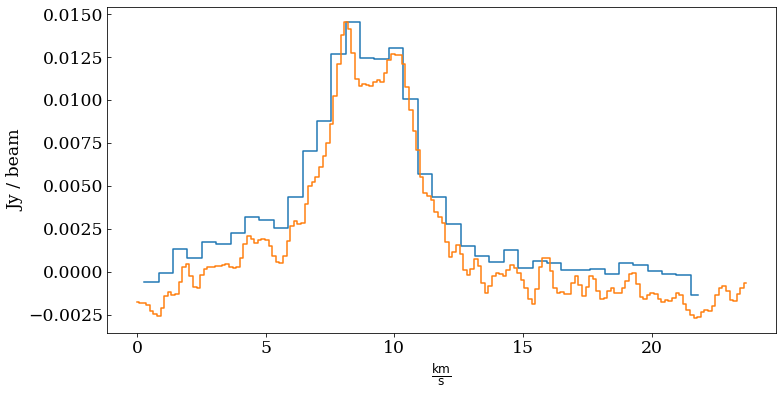

In [111]:
Cube1[:,588,610].quicklook()
Cube2[:,588,610].quicklook()

In [108]:
test = Cube1.moment(axis=0,order=1)

invalid value encountered in true_divide


In [109]:
fits.writeto('test.fits', test.data, test.header)

# arcsec to AU

In [27]:
def arcsec_au(d,theta) :
    return (d*theta*u.au).value





In [28]:
arcsec_au(164.5, 46)

7567.0

In [ ]:
R = []
for i in range(len(Offset)) :
    
    R.append(arcsec_au(164.5,Offset[i]))


# Keplerian Profile

In [ ]:
def Keplerian(dist, mass, v0=0., r0=0.):

    v = np.sign(dist - r0) * np.sqrt(constants.G * mass * constants.M_sun / np.abs(dist - r0)/u.au).to(u.km/u.s).value + v0
    return v

In [ ]:
Vel_kep = []
for i in range(len(R)) :
    
    Vel_kep.append(Keplerian(dist=R[i],mass=0.05, v0=vlsr, r0=0))

In [ ]:
#from astropy.visualization import quantity_support
#quantity_support()
plt.plot(R,Vel_kep)

In [ ]:
R = np.arange(1e4,20e4,1)
M=0.05*1.99e30

In [ ]:
Vel_kep = []
Pos = []
M=0.05*1.99e30
for i in range(len(R)):
    
    Vel_kep.append(Vel_kepler(R[i],M))
    Pos.append(i)

# Cutout

In [ ]:
def load_cutout(file_in, is_hdu=False) : 
    if is_hdu == False :
        hdu = fits.open(file_in)[0]
    else : 
        hdu = file_in
    cutout = Cutout2D(hdu.data, position=center_map, size=cutout_size, wcs = WCS(hdu.header))
    hdu.data = cutout.data
    hdu.header.update(cutout.wcs.to_header())
    return hdu

In [ ]:
Cube_SO = SpectralCube.read(filename="Documents/B335_Combine_SO_rob05_fit1_2sigma_self_clean.fits")
Cube_SO_vel = Cube_SO.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=261.84368400 * u.GHz)
Cube_SO_vel.write('Documents/SO/Cube_SO_vel.fits', overwrite=True)

In [ ]:
Cube_C18O = SpectralCube.read(filename="Documents/C18O/B335_Combine_C18O_HRA_rob05_fit1_01kms_3sigma_self_clean.fits")
Cube_C18O_vel = Cube_C18O.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=219.56035410 * u.GHz)
Cube_C18O_vel.write('Documents/C18O/Cube_C18O_vel_01kms.fits', overwrite=True)

In [ ]:
Cube_CS = SpectralCube.read(filename="Documents/CS/B335_Combine_CS_rob05_fit1_3sigma_self_clean.fits")
Cube_CS_vel = Cube_CS.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=342.8828503 * u.GHz)
Cube_CS_vel.write('Documents/CS/Cube_CS_vel.fits', overwrite=True)

In [ ]:
CS_TdV = Cube_CS_vel.moment(order=0,axis=0)

In [ ]:
fits.writeto('Documents/CS/B335_CS_mom0.fits', CS_TdV.data, CS_TdV.header, overwrite=True)

In [ ]:
Cube_C18O_vel = SpectralCube.read(filename="Documents/C18O/Cube_C18O_vel_01kms.fits")

In [ ]:
Cube_C18O_HD = SpectralCube.read(filename="Downloads/HD_163296_C18O_220GHz.robust_0.5.image.fits")

In [ ]:
length = 6 * u.arcsec
angle = 45 * u.deg
width = 1
Coords_HD163296 = SkyCoord("17h56m21.29s", "-21d57m22.5s")

PV_cut = PathFromCenter(center=Coords_HD163296, length=length, angle=angle, width=width)

ax = pl.subplot(111, projection=Cube_C18O_HD.wcs.celestial)
ax.imshow(Cube_C18O_HD[60].value)
PV_cut.show_on_axis(ax, spacing=1, color='r')
ax.set_xlabel(f"Right Ascension [{Cube_C18O_HD.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{Cube_C18O_HD.wcs.wcs.radesys}]")

In [ ]:
from astropy.coordinates import FK5

Center = SkyCoord("19h37m0.9s","7d34m9.6s")
#skypath = Path(SkyCoord(['19h37m00.89s', '19h37m00.89s'], ['7d34m9s', '7d34m10s'], frame=FK5))
#skypath = Path(SkyCoord(['19h37m00.875s', '19h37m00.905s'], ['7d34m9.2s', '7d34m10s'], frame=FK5))
#skypath = PathFromCenter(center=Center, length = 1 * u.arcsec, angle = 30 * u.deg)
skypath = PathFromCenter(center=position, length = 6 * u.arcsec, angle = 0 * u.deg, width = 1)

In [ ]:
path = Path([(625,625), (625,650)])
#path = Path([(620,580), (635,580)])

ax = pl.subplot(111, projection=Cube_SO_vel.wcs.celestial)
ax.imshow(Cube_SO_vel[90].value)
#skypath.show_on_axis(ax, spacing=1, color='r')
ax.set_xlabel(f"Right Ascension [{Cube_SO_vel.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{Cube_SO_vel.wcs.wcs.radesys}]")

In [ ]:
ax1 = plt.subplot2grid(shape=(2,2), loc=(0,0), projection=Cube_C18O_vel.wcs.celestial)
ax2 = plt.subplot2grid((2,2), (0,1), projection=Cube_C18O_vel.wcs.celestial)
ax3 = plt.subplot2grid((2,2), (1,0), projection=Cube_C18O_vel.wcs.celestial)

ax1.contour(Cube_C18O[12].value, levels_C18O)
ax2.contour(Cube_C18O[13].value, levels_C18O)
ax3.contour(Cube_C18O[13].value, levels_C18O)
ax1.set_xlabel(f"Right Ascension [{Cube_SO_vel.wcs.wcs.radesys}]")
ax1.set_ylabel(f"Declination [{Cube_SO_vel.wcs.wcs.radesys}]")
plt.tight_layout()

# PV Diagram

In [ ]:
file = 'Documents/B335_Combine_SO_rob05_fit1_2sigma_self_clean.fits'

spectral_ax = 'Normal'

#rest_freq = 219.56035410 * u.GHz
rest_freq = 261.84368400 * u.GHz

Cube = SpectralCube.read(file).with_spectral_unit(u.km/u.s, velocity_convention='radio', 
                                                  rest_value=rest_freq)

skypath = PathFromCenter(center=position, length = 2 * u.arcsec, angle = 0* u.deg, width = 1)
pvdiagram = extract_pv_slice(cube=Cube, path=skypath, spacing=1)

In [ ]:
plt.plot(Cube_C18O_vel.spectral_axis, pvdiagram.data)
plt.axvline(8.34, color = 'black', linestyle = 'dashed')

In [ ]:
pvdiagram.writeto('Documents/H13CO/PVDiagram_H13CO_10as_Odeg.fits')

In [ ]:
import matplotlib.ticker as ticker

ww = WCS(pvdiagram.header)
ww.wcs.cdelt[1] /= 1000.0
ww.wcs.crval[1] /= 1000.0
ww.wcs.cunit[1] = u.km/u.s
ww.wcs.cdelt[0] *= 3600
ww.wcs.cunit[0] = u.arcsec
ww.wcs.crval[0] -= 1

ax = pl.subplot(111, projection=ww)
im = ax.imshow(pvdiagram.data)
#im = ax.contour(pvdiagram.data, levels=levels_C18O, colors='black', linewidths=1, alpha=0.5)
#cb = pl.colorbar(mappable=im)
#cb.set_label("Intensity (Jy/beam)")

#plt.scatter(Pix, Max_vel, marker = '.', color = 'blue')
#plt.plot(Pos,Vel_kep)

#ax.hlines(110.5, -0.5, 165.5, color = 'red', linestyle = 'dotted')
#ax.axvline(83, color = 'black', linestyle = 'dashed')
#ax.axvline(83.5, color = 'black', linestyle = 'dashed')
#ax.hlines(12.5, -0.5, 165.5, color = 'red', linestyle = 'dotted')

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcsec)
ax0.set_major_formatter('x.x')
#ax0.set_ticks([-4,-2,0,2,4]*u.arcsec)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
#ax.set_ylim(70,150)
ax.set_aspect(0.1)
ax.set_ylabel("Velocity (km/s)")
ax.set_xlabel("Offset ('')")
#ax.invert_yaxis()
plt.tight_layout()

In [ ]:
Offset = []
offset = 0
for i in range(ww.array_shape[1]) :
            
    Offset.append(offset-5)
        
    offset += ww.wcs.cdelt[0]


In [ ]:
Max_vel = []
Pix = []
offset = 0
rms = 0.002269
snr = 5*rms

for i in range(ww.array_shape[1]) :
    
    for j in range(len(pvdiagram.data)) :
    #for j in range(20,34) :
        
        if pvdiagram.data[j][i] >= snr :
            
            #Max_vel.append(Cube_SO_vel.spectral_axis[j])
            Max_vel.append(j)
            Pix.append(offset)
            #print(Cube_C18O_vel.spectral_axis[j])
            break
        
    offset += 1


In [ ]:
Spec_SO = Sub_Cube_SO[:, 200,200]
vel_ax =Cube_SO_vel.spectral_axis 

In [ ]:
plt.plot(vel_ax, Spec_SO)

# Fit

data_dir = 'data/'
fit_dir = 'fit/'

file_in = 'Documents/Sub_Cube_C18O.fits'
#rms_file 
file_par = 'Documents/Spec_C18O_fit_3snr_300pix.fits'


#SO
#freq_line = 261.84368400 * u.GHz

#C18O

freq_line = 219.56035410 * u.GHz


snr_min = 3.0
xmax = 150; ymax = 150
# range of parameters
vmin = 2.5; vmax = 13
tpeak_min = 0.0; tpeak_max = 500e-3
dv_min = 0.02; dv_max = 6.0

# Load cube and setup the spectral axis
cube = pyspeckit.Cube(file_in)
cube.xarr.refX = freq_line
cube.xarr.velocity_convention = 'radio'
cube.xarr.convert_to_unit('km/s')

err_map = np.ones((300, 300))*1.4e-3
# Initial guess value
guesses = np.array([50e-3, 8.34, 1])

cube.fiteach(guesses=guesses,
    start_from_point=(xmax, ymax),
    fittype='gaussian', blank_value=np.nan,verbose_level=0,
    use_neighbor_as_guess=True,
    limitedmax=[True, True, True],
    limitedmin=[True, True, False],
    maxpars=[tpeak_max, vmax, dv_max],
    minpars=[tpeak_min, vmin, dv_min],
    multicore=5, errmap=err_map, signal_cut=snr_min)

cube.write_fit(file_par, overwrite=True)

In [ ]:
Cube_H13CO = SpectralCube.read(filename="Documents/H13CO/B335_Combine_H13COp_32_rob05_2sigma_self_clean.fits")
Cube_H13CO_vel = Cube_H13CO.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=260.25533900 * u.GHz)
Cube_H13CO_vel.write('Documents/H13CO/Cube_H13CO_32_vel.fits', overwrite=True)

In [ ]:
file_par = 'Documents/CS/Spec_CS_fit_5snr.fits'

data, hd = fits.getdata(file_par, header=True)

hd_2d = hd.copy()
key_list = ['NAXIS3', 'CRPIX3', 'SPECSYS', 'CDELT3', 'CUNIT3', 'CTYPE3', 'CRVAL3']
for key_i in key_list:
    hd_2d.remove(key_i)
hd_2d['NAXIS'] = 2
hd_2d['WCSAXES'] = 2
hd_2d['BITPIX'] = 8
file_vc_N2Hp_thick = 'Documents/B335_N2Hp_vlsr.fits'
#file_bright = 'Documents/B335_SO_brightness.fits'
file_dv_N2Hp_thick = 'Documents/B335_N2Hp_dv.fits'

file_vc_N2Hp_thin = 'Documents/B335_N2Hp_vlsr_thin.fits'
#file_bright = 'Documents/B335_SO_brightness.fits'
file_dv_N2Hp_thin = 'Documents/B335_N2Hp_dv_thin.fits'


file_dv_SO = 'Documents/SO/B335_SO_dv_5snr_014kms.fits'
file_vc_SO_1st = 'Documents/SO/B335_SO_vlsr_5snr_014kms_1st.fits'
file_vc_SO_2nd = 'Documents/SO/B335_SO_vlsr_5snr_014kms_2nd.fits'
file_vc_SO_3rd = 'Documents/SO/B335_SO_vlsr_5snr_014kms_3rd.fits'


file_vc_CS = 'Documents/CS/B335_CS_vlsr_5snr.fits'
file_dv_CS = 'Documents/CS/B335_CS_dv_5snr.fits'

file_vc_H13CO = 'Documents/H13CO/B335_H13CO_32_vlsr_1comp_5snr.fits'
file_dv_H13CO = 'Documents/H13CO/B335_H13CO_32_dv_1comp_5snr.fits'

file_vc_H13CO_blueshift = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_blueshift_noconstraints.fits'
file_dv_H13CO_blueshift = 'Documents/H13CO/B335_H13CO_32_dv_5snr_blueshift_noconstraints.fits'

file_vc_H13CO_redshift = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_redshift_noconstraints.fits'
file_dv_H13CO_redshift = 'Documents/H13CO/B335_H13CO_32_dv_5snr_redshift_noconstraints.fits'

#file_TdV_C18O = 'Documents/C18O/B335_C18O_TdV_5snr_50pix.fits'
file_vc_C18O = 'Documents/C18O/B335_C18O_vlsr_01kms_5snr.fits'
file_dv_C18O = 'Documents/C18O/B335_C18O_dv_01kms_5snr.fits'

hd_2d['BUNIT'] = 'km/s'
fits.writeto(file_vc_CS, np.squeeze(data[1, :, :]), hd_2d, overwrite=True)

In [ ]:
data, hd = fits.getdata(file_cont, header=True)

hd_2d = hd.copy()
key_list = ['NAXIS3', 'CRPIX3', 'SPECSYS', 'CDELT3', 'CUNIT3', 'CTYPE3', 'CRVAL3', 
            'NAXIS4', 'CRPIX4', 'CDELT4', 'CUNIT4', 'CTYPE4', 'CRVAL4',
           'PC01_03', 'PC02_03', 'PC03_03', 'PC04_03', 'PC01_04', 'PC02_04', 'PC03_04', 'PC04_04',
           'PC03_01', 'PC04_01', 'PC03_02', 'PC04_02']
for key_i in key_list:
    hd_2d.remove(key_i)
hd_2d['NAXIS'] = 2
hd_2d['WCSAXES'] = 2
hd_2d['BITPIX']=8
file_vc = 'Documents/B335_SO_vlsr.fits'
file_bright = 'Documents/B335_SO_brightness.fits'
file_dv = 'Documents/B335_SO_dv.fits'

hd_2d['BUNIT'] = 'km/s'
#fits.writeto(file_cont_squeeze, np.squeeze(data[0, :, :]), hd_2d, overwrite=True)

# Peak Brightness map

In [ ]:
frame = 0
hdu_SO_vel = fits.open(file_par)[0]
cmap = cm.get_cmap('magma').copy()
cmap.set_bad('0.9')
#plt.imshow(projection=WCS(hdu_SO_vel.header), slices=('x', 'y', frame))
plt.imshow(hdu_SO_vel.data[frame, :, :], cmap=cmap, vmin=0)
plt.gca().invert_yaxis()
cbar = plt. colorbar()
cbar.set_label('Intensity (Jy/beam)', rotation=270)

In [ ]:
hdu_bright = load_cutout(file_dv)
cmap_bright = cm.get_cmap('magma').copy()
cmap_bright.set_bad('0.9')
#ax = plt.subplot(projection=WCS(hdu.header))
plt.imshow(hdu_bright.data, origin = "lower", cmap=cmap_bright)
cbar = plt. colorbar()
#cbar.set_label('Brightness (Jy/beam)', rotation=270)
plt.show()

In [ ]:
hdu = load_cutout('Documents/B335/data/B335_N2H+_10_v1_Tpeak.fits')
cmap = cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad('0.7')
#ax = plt.subplot(projection=WCS(hdu.header))
plt.imshow(hdu.data, origin = "lower", cmap=cmap)
cbar = plt. colorbar()
#cbar.set_label('Velocity (km/s)', rotation=270)
plt.show()

In [ ]:
frame = 1
vlsr=8.34
cmap = cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad('0.7')
#ax = plt.subplot(projection=WCS(hdu_SO_vel.header), slices=('x', 'y', frame))
plt.imshow(hdu_SO_vel.data[frame, :, :], origin = 'lower', cmap=cmap, vmin=vlsr-1, vmax=vlsr+1)
cbar = plt.colorbar()
plt.show()

In [ ]:
frame = 2
cmap = cm.get_cmap('magma').copy()
cmap.set_bad('0.9')
#ax = plt.subplot(projection=WCS(hdu_SO_vel.header), slices=('x', 'y', frame))
plt.imshow(hdu_SO_vel.data[frame, :, :], origin = 'lower', cmap=cmap, vmin = 0)
cbar = plt.colorbar()
plt.show()

In [ ]:
frame = 1
cmap = cm.get_cmap('magma').copy()
cmap.set_bad('0.9')
#ax = plt.subplot(projection=WCS(hdu_SO_vel.header), slices=('x', 'y', frame))
plt.imshow(hdu_SO_vel.data[frame, :, :], origin = 'lower', cmap=cmap, vmin = 0)
cbar = plt.colorbar()
plt.show()

In [ ]:
hdu_SO_vel.header

In [ ]:
Cube_C18O_vel[:, 450, 450].quicklook()

In [ ]:
C18O_TdV = Cube_C18O_vel.moment(order=0, axis=0)

In [ ]:
Cube_C18O_vel.allow_huge_operations=True

In [ ]:
Tp = Cube_C18O_vel.max(axis=0)

In [ ]:
Tp

In [ ]:
fits.writeto('Documents/C18O/B335_C18O_mom0.fits', C18O_TdV.data, C18O_TdV.header, overwrite=True)

In [ ]:
N2Hp_Vlsr = Cube_N2Hp.moment(order=1, axis=0)

In [ ]:
SO_TdV = Cube_SO_vel.moment(order=0,axis=0)

In [ ]:
def load_myCube( file_in):
    cube = pyspeckit.Cube(file_in)
    cube.xarr.refX = freq_line
    cube.xarr.velocity_convention = 'radio'
    cube.xarr.convert_to_unit('km/s')
    return cube

In [ ]:
file_cube = 'Documents/B335/data/B335_N2H+_10_K_v1.fits'

freq_line = rest_freq = 86.7542884 * u.GHz

Cube = SpectralCube.read(file_cube).with_spectral_unit(u.km/u.s, velocity_convention='radio', 
                                                  rest_value=rest_freq)

cube = load_myCube(file_cube)
cube.Registry.add_fitter('n2hp_vtau', pyspeckit.models.n2hp.n2hp_vtau_fitter, 4)

In [ ]:
x = xpix = 226
y = ypix = 223
Spec = cube.get_spectrum(ypix,xpix)


In [ ]:
snr_min = 5.
F = False
T = True

# range of parameters
vmin = 7.5; vmax = 9
tpeak_min = 0; tpeak_max = 500e-3
dv_min = 0.05; dv_max = 6.0

In [ ]:
guesses=[250, 0.1, 8.3, 0.1, 100, 0.1, 8.6, 0.1]
#guesses=[7.0, 2.0, 8.3, 0.1]

Spec.specfit(fittype='n2hp_vtau', guesses=guesses,
             limitedmin=[T,T,T,T,T,T,T,T],
             limitedmax=[T,F,T,T,T,F,T,T],
             fixed = [F,T,F,F,F,T,F,F],
             minpars=[ 0.1,  0,vmin,0.05,0.1,  0,vmin,0.05],
             maxpars=[270,0,vmax,1.0,270.0,0,vmax,1.0])

In [ ]:
Spec.plotter()
Spec.specfit.plot_fit()
Spec.specfit.plot_components()
Spec.specfit.plotresiduals(axis=Spec.plotter.axis, clear=False, label=False)

In [ ]:
data, hd = fits.getdata('Documents/B335/B335_N2Hp_v1_thick_fitted_parameters_2comp_3snr.fits', header=True)

In [ ]:
#test_2nd = (data[0, xpix, ypix] - T_CMB) * (1 - np.exp(-data[1, xpix, ypix]))

Cube[:,xpix,ypix].quicklook(label = 'Data')

#plt.step(Cube.spectral_axis.value,test_2nd, label = '2comp') 

plt.legend()

In [ ]:


freq_dict_cen ={
                'J1-0':  93173.7637e6,
               }

voff_lines_dict={
    ####### J 1-0
    'J1-0_01': -7.9930,
    'J1-0_02': -7.9930,
    'J1-0_03': -7.9930,
    'J1-0_04': -0.6112,
    'J1-0_05': -0.6112,
    'J1-0_06': -0.6112,
    'J1-0_07': 0.0000,
    'J1-0_08': 0.9533,
    'J1-0_09': 0.9533,
    'J1-0_10': 5.5371,
    'J1-0_11': 5.5371,
    'J1-0_12': 5.5371,
    'J1-0_13': 5.9704,
    'J1-0_14': 5.9704,
    'J1-0_15': 6.9238,
    }

line_strength_dict = {
    ####### J 1-0
    'J1-0_01': 0.025957,
    'J1-0_02': 0.065372,
    'J1-0_03': 0.019779,
    'J1-0_04': 0.004376,
    'J1-0_05': 0.034890,
    'J1-0_06': 0.071844,
    'J1-0_07': 0.259259,
    'J1-0_08': 0.156480,
    'J1-0_09': 0.028705,
    'J1-0_10': 0.041361,
    'J1-0_11': 0.013309,
    'J1-0_12': 0.056442,
    'J1-0_13': 0.156482,
    'J1-0_14': 0.028705,
    'J1-0_15': 0.037038,
}

# Get frequency dictionary in Hz based on the offset velocity and rest frequency
conv_J10=u.doppler_radio(freq_dict_cen['J1-0']*u.Hz)
freq_dict = {
    name: ((voff_lines_dict[name]*u.km/u.s).to(u.Hz, equivalencies=conv_J10).value) for name in voff_lines_dict.keys() if "J1-0" in name
    }

# relative_strength_total_degeneracy is not used in the CLASS implementation
# of the hfs fit. It is the sum of the degeneracy values for all hyperfines
# for a given line; it gives the relative weights between lines.
# Hyperfine weights are treated as normalized within one rotational transition.
w10 = sum(val for name,val in line_strength_dict.items() if 'J1-0' in name)
relative_strength_total_degeneracy = {
    name : w10 for name  in line_strength_dict.keys() if "J1-0" in name
    }
# Get the list of line names from the previous lists
line_names = [name for name in voff_lines_dict.keys()]

n2hp_vtau = pyspeckit.models.hyperfine.hyperfinemodel(line_names, voff_lines_dict, freq_dict,
                                     line_strength_dict,
                                     relative_strength_total_degeneracy)

In [ ]:
test = n2hp_vtau(Cube.spectral_axis, Tex=data[0,xpix,ypix], tau=data[1,xpix,ypix],xoff_v=data[2,xpix,ypix], width=data[3,xpix,ypix]) + 
n2hp_vtau(Cube.spectral_axis, Tex=data[4,xpix,ypix], tau=data[5,xpix,ypix],xoff_v=data[6,xpix,ypix], width=data[7,xpix,ypix])

In [ ]:
Cube[:,xpix,ypix].quicklook()
plt.step(Cube.spectral_axis.value,test)

In [ ]:
T = 118 * u.K
m = 48.06 * 1.66054e-27 * u.kg
k = constants.k_B

In [ ]:
D = np.sqrt(8*np.log(2)*k*T/m).to(u.km/u.s)

In [ ]:
D*2.4